In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load data from Basketball Reference

In [2]:
# load all stat tables (each with all current players)

# per game
page_pg = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_per_game.html')
soup_pg = BeautifulSoup(page_pg.text, 'html.parser')

# advanced
page_adv = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_advanced.html')
soup_adv = BeautifulSoup(page_adv.text, 'html.parser')

# advanced shooting
page_sho = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_shooting.html')
soup_sho = BeautifulSoup(page_sho.text, 'html.parser')

# adjusted shooting
page_adjSho = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_adj_shooting.html')
soup_adjSho = BeautifulSoup(page_adjSho.text, 'html.parser')

# stats per 36 min
page_36 = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_per_minute.html')
soup_36 = BeautifulSoup(page_36.text, 'html.parser')

# stats per 100 poss
page_100 = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_per_poss.html')
soup_100 = BeautifulSoup(page_100.text, 'html.parser')

# totals
page_tot = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_totals.html')
soup_tot = BeautifulSoup(page_tot.text, 'html.parser')

## per game

In [3]:

masterList = []
for i in soup_pg:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            row = []
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                            
                
                # end when all stats are added to row
                if len(row) == 29:
                    masterList.append(row)
                    break

per_game_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])

## advanced

In [4]:

masterList = []
for i in soup_adv:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            
            row = []
            
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                
                # end when all stats are added to row
                if len(row) == 28:
                    masterList.append(row)
                    break

advanced_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','MP','PER','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','-','OWS','DWS','WS','WS/48','-','OBPM','DBPM','BPM' ,'VORP'])
advanced_df = advanced_df[['Player','PER','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS','WS/48','OBPM','DBPM','BPM' ,'VORP']]         

## advanced shooting

In [5]:

masterList = []
for i in soup_sho:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            
            row = []
            
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                
                # end when all stats are added to row
                if len(row) == 34:
                    masterList.append(row)
                    break

shooting_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','MP','FG%','Dist.','-','%FGA_by_dist_2P','%FGA_by_dist_0-3','%FGA_by_dist_3-10','%FGA_by_dist_10-16','%FGA_by_dist_16-3P','%FGA_by_dist_3P','-','FG%_by_dist_2P','FG%_by_dist_0-3','FG%_by_dist_3-10','FG%_by_dist_10-16','FG%_by_dist_16-3P','FG%_by_dist_3P','-','%_FG_assisted_2P','%_FG_assisted_3P','-','%FGA_dunks','made_dunks','-','corner_%3PA','corner_3P%','-','att_heaves','made_heaves'])
shooting_df = shooting_df[['Player','Dist.','%FGA_by_dist_2P','%FGA_by_dist_0-3','%FGA_by_dist_3-10','%FGA_by_dist_10-16','%FGA_by_dist_16-3P','%FGA_by_dist_3P','FG%_by_dist_2P','FG%_by_dist_0-3','FG%_by_dist_3-10','FG%_by_dist_10-16','FG%_by_dist_16-3P','FG%_by_dist_3P','%_FG_assisted_2P','%_FG_assisted_3P','%FGA_dunks','made_dunks','corner_%3PA','corner_3P%','att_heaves','made_heaves']]                                  

## adjusted shooting

In [6]:

masterList = []
for i in soup_adjSho:
    
    # split by player
    for j in str(i).split('\n'):
        if '<th scope="row" class="right' in j:
            row = []
            for k in j.split("</td>"):
                
                if 'th scope="row" class="right "' in k:
                    temp = k[k.index('.html">')+7:]
                    temp = temp[:temp.index('<')]
                    name = ""
                    firstName = True
                    nameList = str(temp).split(' ')
                    
                    name += nameList[1]
                    name += ','
                    name += nameList[0]
                    row.append(name)
                    
                else:
                    currStat = k[k.index(">")+1:]
                   
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                
                # end when all stats are added to row
                if len(row) == 27:
                    masterList.append(row)
                    break
                    
adjShooting_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Team','G','MP','-','FG','2P','3P','eFG','FT','TS','FTr','3PAr','-','FG+ (L.A.)','2P+ (L.A.)','3P+ (L.A.)','eFG+ (L.A.)','FT+ (L.A.)','TS+ (L.A.)','FTr+ (L.A.)','3PAr+ (L.A.)','-','FG Add','TS Add'])
adjShooting_df = adjShooting_df[['Player','FG+ (L.A.)','2P+ (L.A.)','3P+ (L.A.)','eFG+ (L.A.)','FT+ (L.A.)','TS+ (L.A.)','FTr+ (L.A.)','3PAr+ (L.A.)','FG Add','TS Add']]


## per 36 min

In [7]:

masterList = []
for i in soup_36:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            
            row = []
            
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                
                # end when all stats are added to row
                if len(row) == 28:
                    masterList.append(row)
                    break

per_36_min_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','GS','MP','FG_per_36','FGA_per_36','FG%_per_36','3P_per_36','3PA_per_36','3P%_per_36','2P_per_36','2PA_per_36','2P%_per_36','FT_per_36','FTA_per_36','FT%_per_36','ORB_per_36','DRB_per_36','TRB_per_36','AST_per_36','STL_per_36','BLK_per_36','TOV_per_36','PF_per_36','PTS_per_36'])
per_36_min_df = per_36_min_df[['Player','FG_per_36','FGA_per_36','FG%_per_36','3P_per_36','3PA_per_36','3P%_per_36','2P_per_36','2PA_per_36','2P%_per_36','FT_per_36','FTA_per_36','FT%_per_36','ORB_per_36','DRB_per_36','TRB_per_36','AST_per_36','STL_per_36','BLK_per_36','TOV_per_36','PF_per_36','PTS_per_36']]                                  

## per 100 poss

In [8]:

masterList = []
for i in soup_100:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            row = []
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                            
                
                # end when all stats are added to row
                if len(row) == 31:
                    masterList.append(row)
                    break

per_100_poss_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','GS','MP','FG_per_100_poss','FGA_per_100_poss','FG%_per_100_poss','3P_per_100_poss','3PA_per_100_poss','3P%_per_100_poss','2P_per_100_poss','2PA_per_100_poss','2P%_per_100_poss','FT_per_100_poss','FTA_per_100_poss','FT%_per_100_poss','ORB_per_100_poss','DRB_per_100_poss','TRB_per_100_poss','AST_per_100_poss','STL_per_100_poss','BLK_per_100_poss','TOV_per_100_poss','PF_per_100_poss','PTS_per_100_poss', '-', 'ORtg', 'DRtg'])
per_100_poss_df = per_100_poss_df[['Player','FG_per_100_poss','FGA_per_100_poss','FG%_per_100_poss','3P_per_100_poss','3PA_per_100_poss','3P%_per_100_poss','2P_per_100_poss','2PA_per_100_poss','2P%_per_100_poss','FT_per_100_poss','FTA_per_100_poss','FT%_per_100_poss','ORB_per_100_poss','DRB_per_100_poss','TRB_per_100_poss','AST_per_100_poss','STL_per_100_poss','BLK_per_100_poss','TOV_per_100_poss','PF_per_100_poss','PTS_per_100_poss', 'ORtg', 'DRtg']]

## totals

In [9]:

masterList = []
for i in soup_tot:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            row = []
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                            
                
                # end when all stats are added to row
                if len(row) == 29:
                    masterList.append(row)
                    break

totals_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','GS','MP_total','FG_total','FGA_total','FG%_total','3P_total','3PA_total','3P%_total','2P_total','2PA_total','2P%_total','eFG%_total','FT_total','FTA_total','FT%_total','ORB_total','DRB_total','TRB_total','AST_total','STL_total','BLK_total','TOV_total','PF_total','PTS_total'])
totals_df = totals_df[['Player','MP_total','FG_total','FGA_total','3P_total','3PA_total','2P_total','2PA_total','FT_total','FTA_total','ORB_total','DRB_total','TRB_total','AST_total','STL_total','BLK_total','TOV_total','PF_total','PTS_total']]

## construct master DF

In [10]:
# join dfs
NBA_df = per_game_df.merge(advanced_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.merge(totals_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.merge(shooting_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.merge(adjShooting_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.merge(per_36_min_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.merge(per_100_poss_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.astype({"Age": int, "G": int, "GS": int, 'FG_total': int,'FGA_total': int,'3P_total': int,'3PA_total': int,'2P_total': int,'2PA_total': int,'FT_total': int,'FTA_total': int,'ORB_total': int,'DRB_total': int,'TRB_total': int,'AST_total': int,'STL_total': int,'BLK_total': int,'TOV_total': int,'PF_total': int,'PTS_total': int})

In [11]:
NBA_df

Player Pos  Age   Tm  G  GS    MP    FG   FGA    FG%  ...  \
0     Achiuwa,Precious  PF   22  TOR  5   5  26.6   4.2  10.2  0.412  ...   
1         Adams,Steven   C   28  MEM  4   4  27.5   4.8   8.8  0.543  ...   
2          Adebayo,Bam   C   24  MIA  4   4  30.5   6.8  13.5  0.500  ...   
3         Aldama,Santi   F   21  MEM  1   0   6.0   3.0   6.0  0.500  ...   
4    Aldridge,LaMarcus   C   36  BRK  4   0  18.0   4.3   6.5  0.654  ...   
..                 ...  ..  ...  ... ..  ..   ...   ...   ...    ...  ...   
411     Young,Thaddeus  PF   33  SAS  2   0   6.0   0.5   1.5  0.333  ...   
412         Young,Trae  PG   23  ATL  4   4  34.3  10.0  21.5  0.465  ...   
413     Yurtseven,Omer   C   23  MIA  3   0   3.7   1.3   2.0  0.667  ...   
414        Zeller,Cody   C   29  POR  4   0  17.5   2.3   3.3  0.692  ...   
415        Zubac,Ivica   C   24  LAC  4   4  21.5   4.0   6.5  0.615  ...   

     DRB_per_100_poss  TRB_per_100_poss  AST_per_100_poss  STL_per_100_poss  \
0                14.0              18.8               2.6               1.1   
1                 9.7              20.2               6.1               1.3   
2                16.1              20.0               2.4               1.2   
3                 0.0              16.1               0.0               0.0   
4                 8.6              12.5               0.7               0.7   
..                ...               ...               ...               ...   
411               0.0               3.9               3.9               0.0   
412               3.9               4.3              13.2               1.4   
413              13.0              13.0               0.0               0.0   
414               8.6              13.2               2.0               1.3   
415               8.8              12.6               5.5               1.1   

     BLK_per_100_poss  TOV_per_100_poss  PF_per_100_poss  PTS_per_100_poss  \
0                 0.4               1.5              4.1              19.2   
1                 0.4               3.1              4.0              18.9   
2                 0.4               3.9              4.3              30.2   
3                 0.0               0.0              8.1              56.4   
4                 4.0               2.6              5.9              25.7   
..                ...               ...              ...               ...   
411               0.0               7.8              7.8               7.8   
412               0.0               4.3              1.1              37.9   
413               0.0               0.0              0.0              34.8   
414               0.7               2.0              7.2              18.4   
415               0.5               0.5              3.8              22.5   

      ORtg   DRtg  
0    105.0  101.0  
1    130.0  119.0  
2    111.0   89.0  
3    121.0  128.0  
4    118.0  105.0  
..     ...    ...  
411   59.0  115.0  
412  118.0  104.0  
413  114.0   94.0  
414  137.0  106.0  
415  137.0  103.0  

[416 rows x 142 columns]

In [12]:
for i in NBA_df.columns:
    print(i)

Player
Pos
Age
Tm
G
GS
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
PER
TS%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
USG%
OWS
DWS
WS
WS/48
OBPM
DBPM
BPM
VORP
MP_total
FG_total
FGA_total
3P_total
3PA_total
2P_total
2PA_total
FT_total
FTA_total
ORB_total
DRB_total
TRB_total
AST_total
STL_total
BLK_total
TOV_total
PF_total
PTS_total
Dist.
%FGA_by_dist_2P
%FGA_by_dist_0-3
%FGA_by_dist_3-10
%FGA_by_dist_10-16
%FGA_by_dist_16-3P
%FGA_by_dist_3P
FG%_by_dist_2P
FG%_by_dist_0-3
FG%_by_dist_3-10
FG%_by_dist_10-16
FG%_by_dist_16-3P
FG%_by_dist_3P
%_FG_assisted_2P
%_FG_assisted_3P
%FGA_dunks
made_dunks
corner_%3PA
corner_3P%
att_heaves
made_heaves
FG+ (L.A.)
2P+ (L.A.)
3P+ (L.A.)
eFG+ (L.A.)
FT+ (L.A.)
TS+ (L.A.)
FTr+ (L.A.)
3PAr+ (L.A.)
FG Add
TS Add
FG_per_36
FGA_per_36
FG%_per_36
3P_per_36
3PA_per_36
3P%_per_36
2P_per_36
2PA_per_36
2P%_per_36
FT_per_36
FTA_per_36
FT%_per_36
ORB_per_36
DRB_per_36
TRB_per_36
AST_per_36
STL_per_36
BLK_per_36
TOV_per_36


# Visualizations

In [13]:
def labeled_scatter(X_axis, Y_axis, figsize_x = 40, figsize_y = 30, 
                    filter_col = None, filter_val = None, greater_than = None):

    if filter_col == None:
        df = NBA_df
    else:
        if greater_than:
            df = NBA_df[NBA_df[filter_col] >= filter_val].reset_index()
        else:
            df = NBA_df[NBA_df[filter_col] <= filter_val].reset_index()
            
    annotations=list(df["Player"])
    plt.figure(figsize=(figsize_x, figsize_y))
    plt.scatter(df[X_axis],df[Y_axis],s=100,color="lightblue")
    plt.xlabel(X_axis, fontsize=30)
    plt.ylabel(Y_axis, fontsize=30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    title = Y_axis + " vs " + X_axis
    plt.title(title,fontsize=35)
    for i, label in enumerate(annotations):
        plt.annotate(label, (df[X_axis][i], df[Y_axis][i]), fontsize=20)

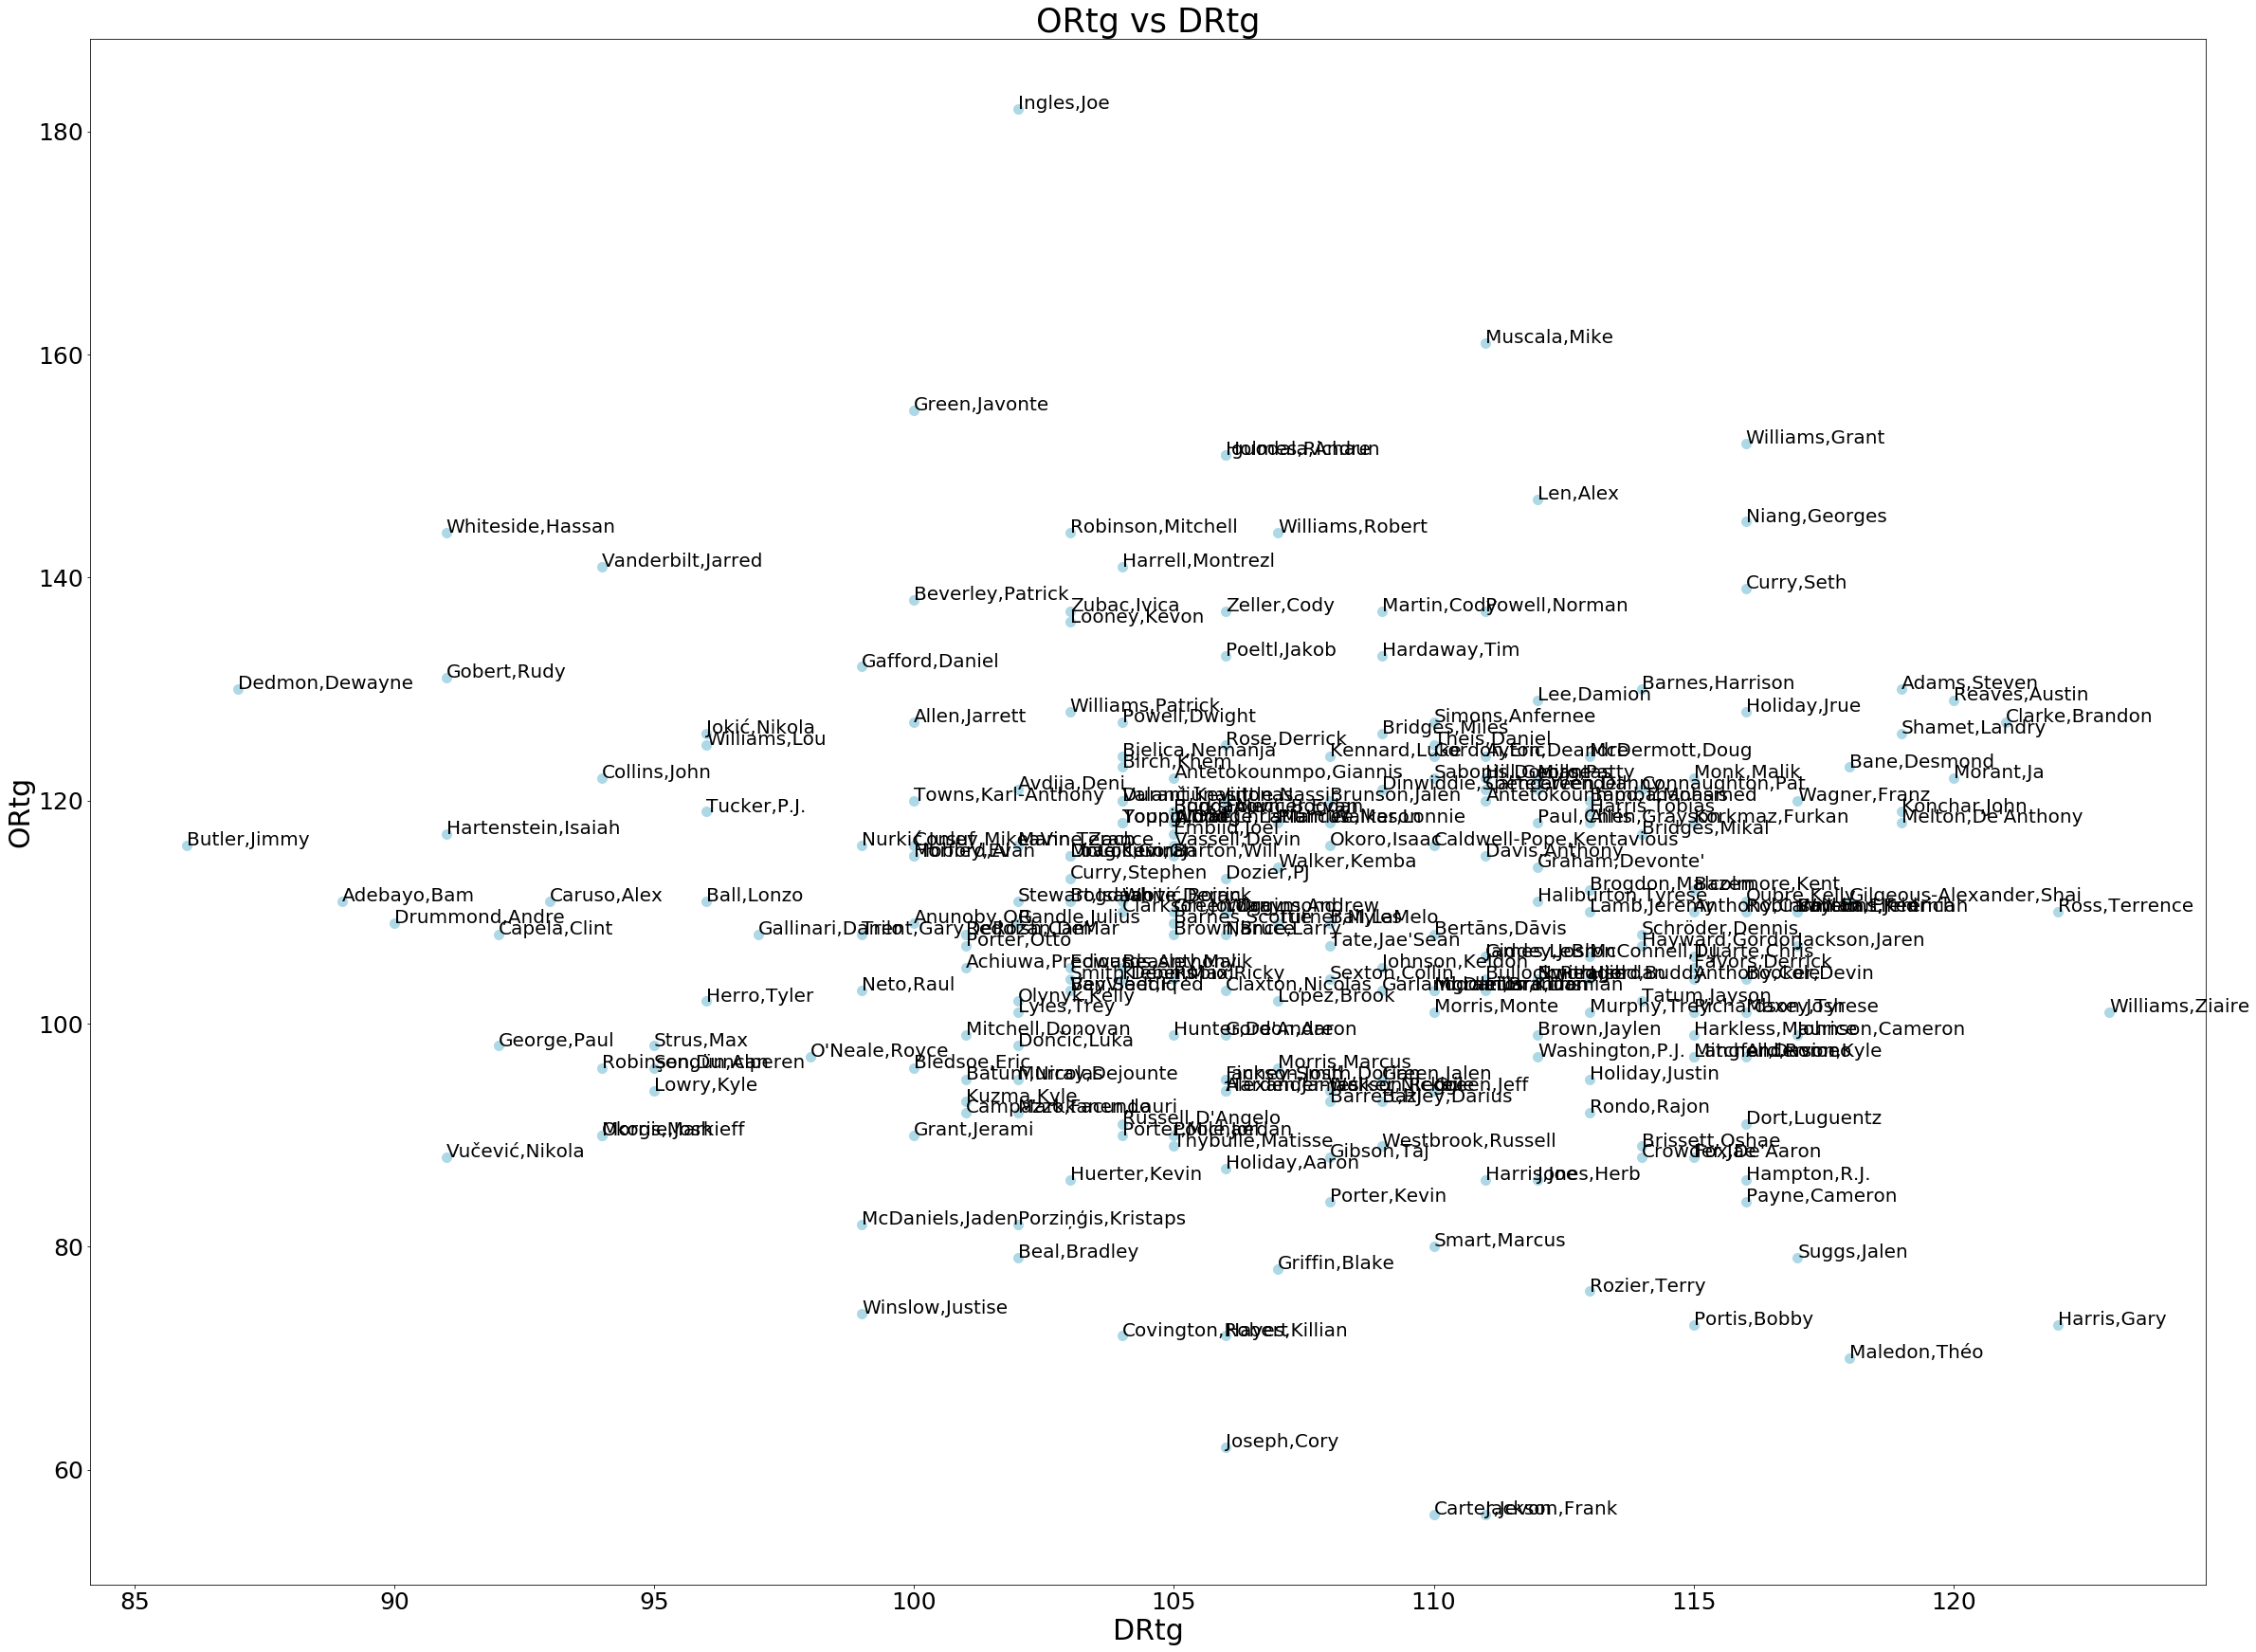

In [14]:
# Offensive rating vs Defensive rating, filtered for players only with at least 15 MPG
labeled_scatter('DRtg', 'ORtg', filter_col = "MP", filter_val = 15, greater_than = True)

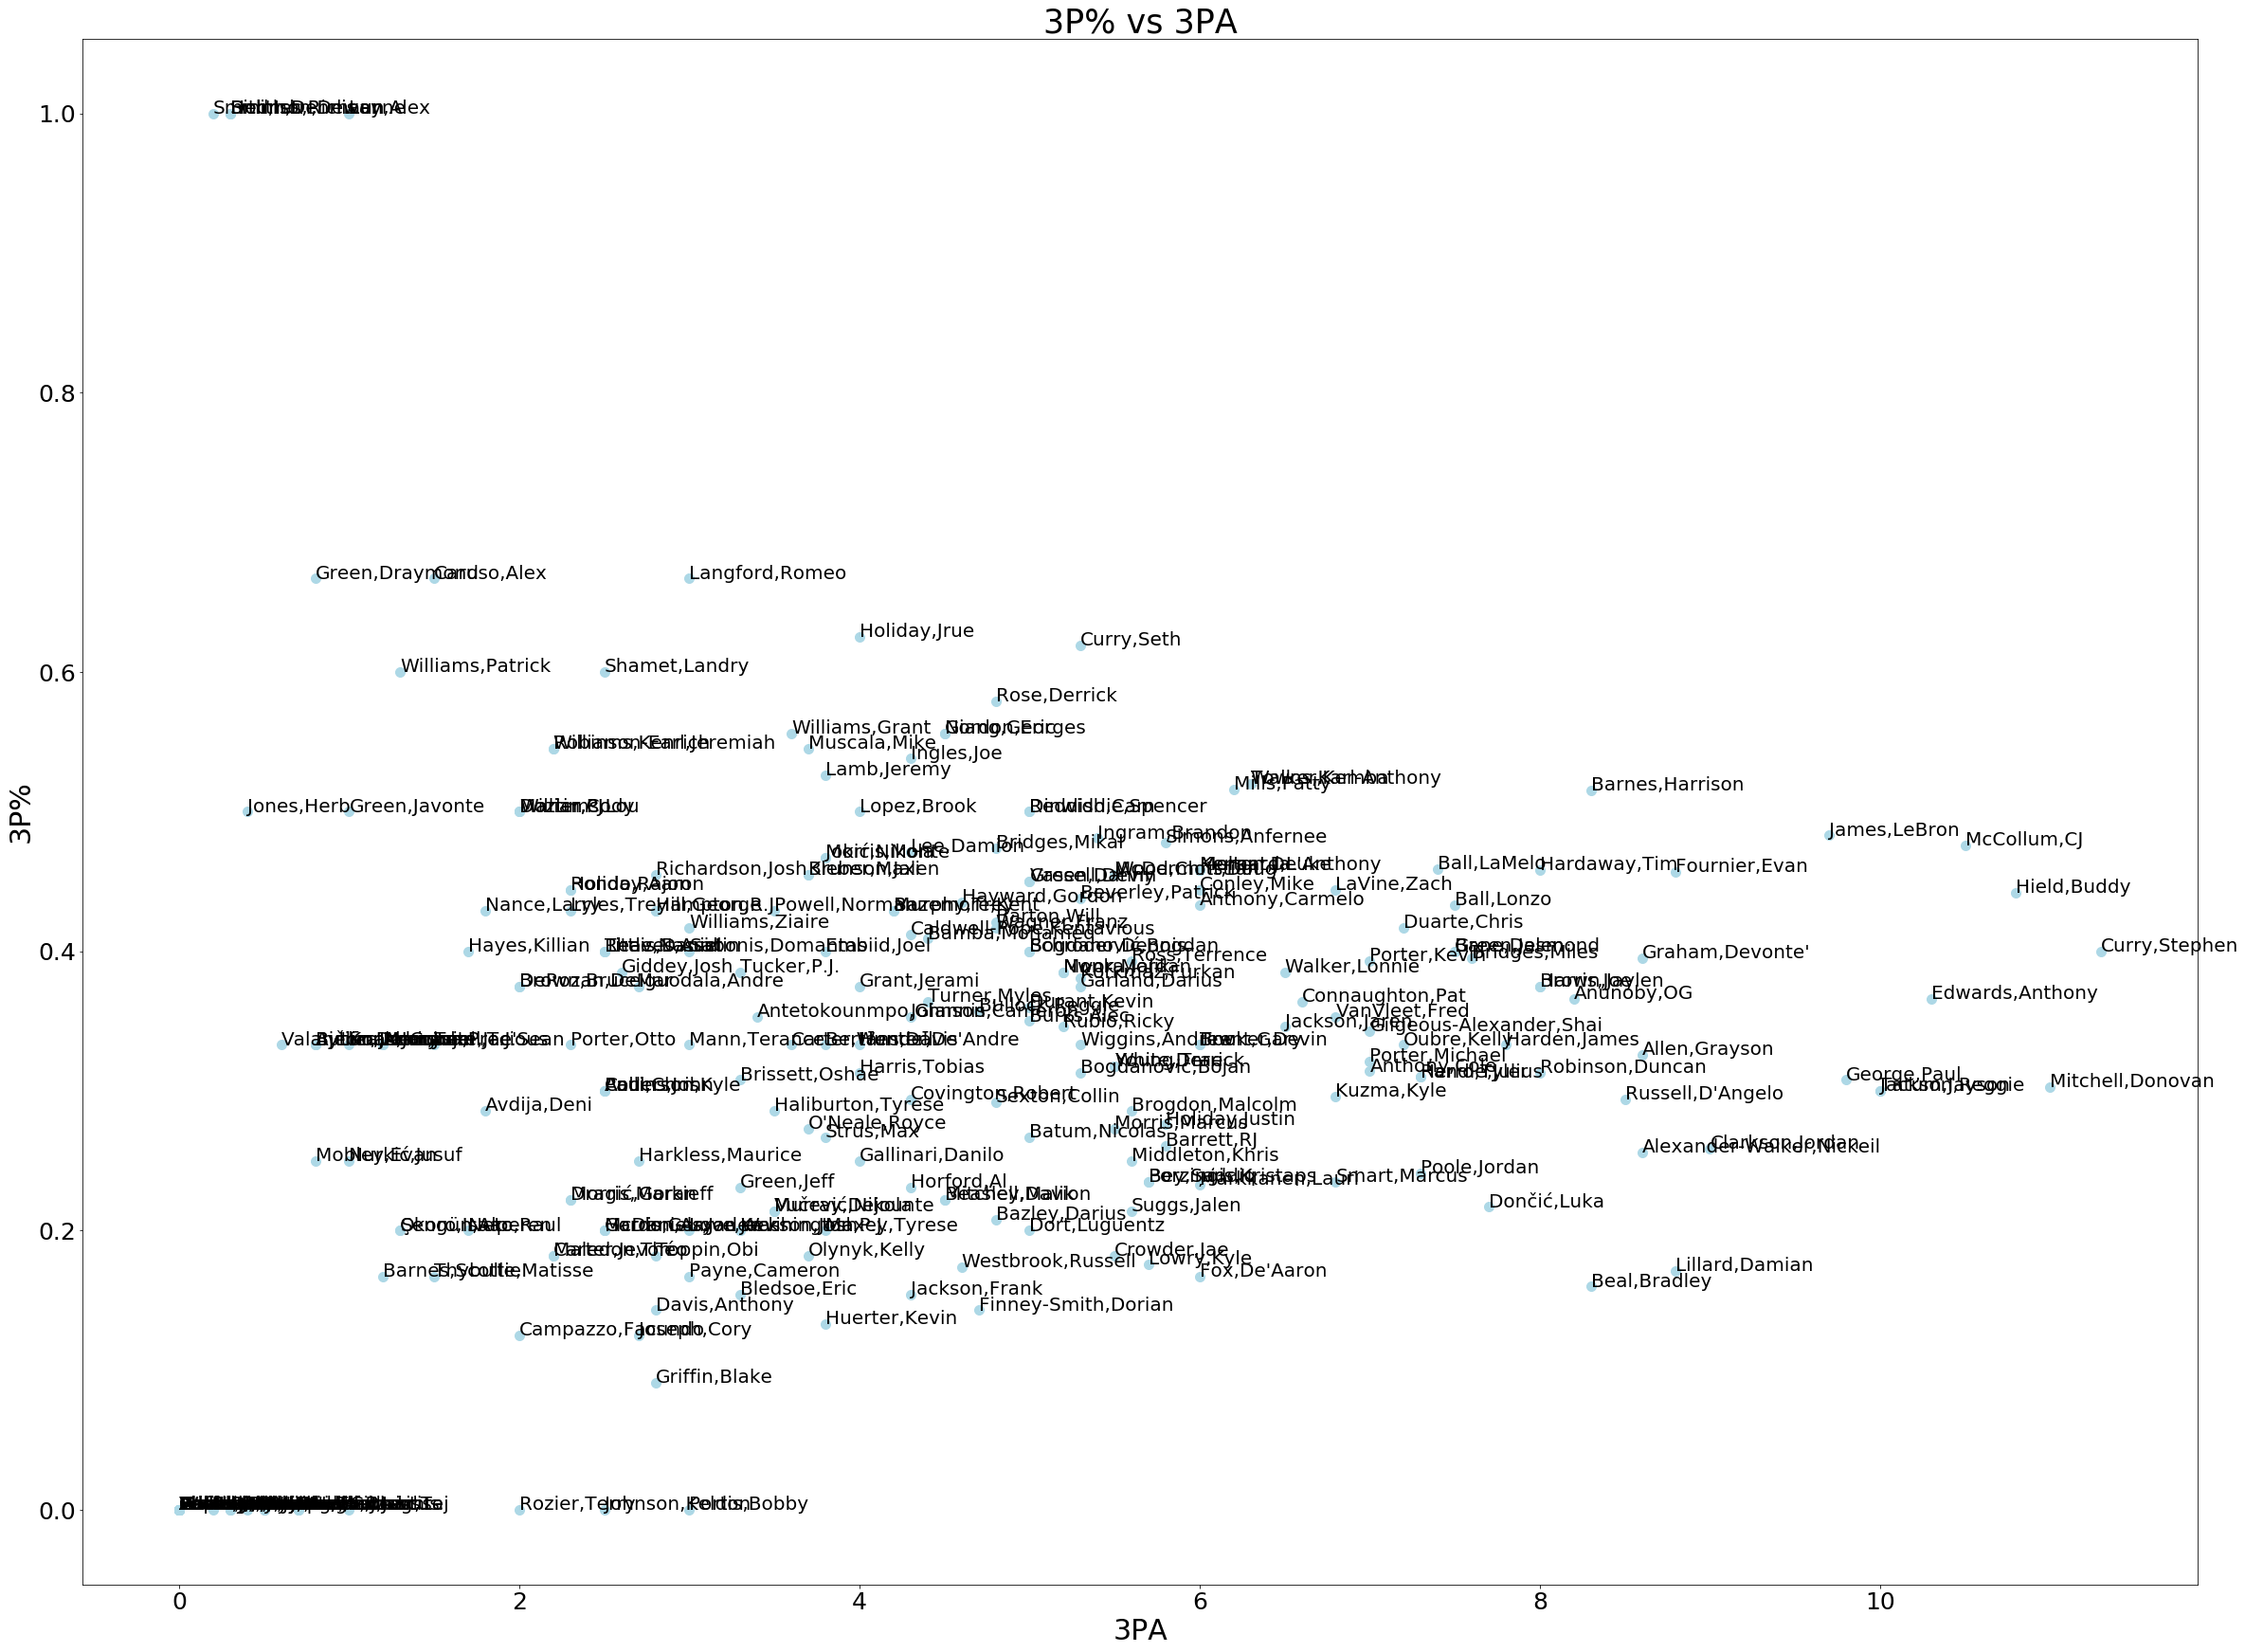

In [15]:
labeled_scatter('3PA', '3P%', filter_col = "MP", filter_val = 15, greater_than = True)

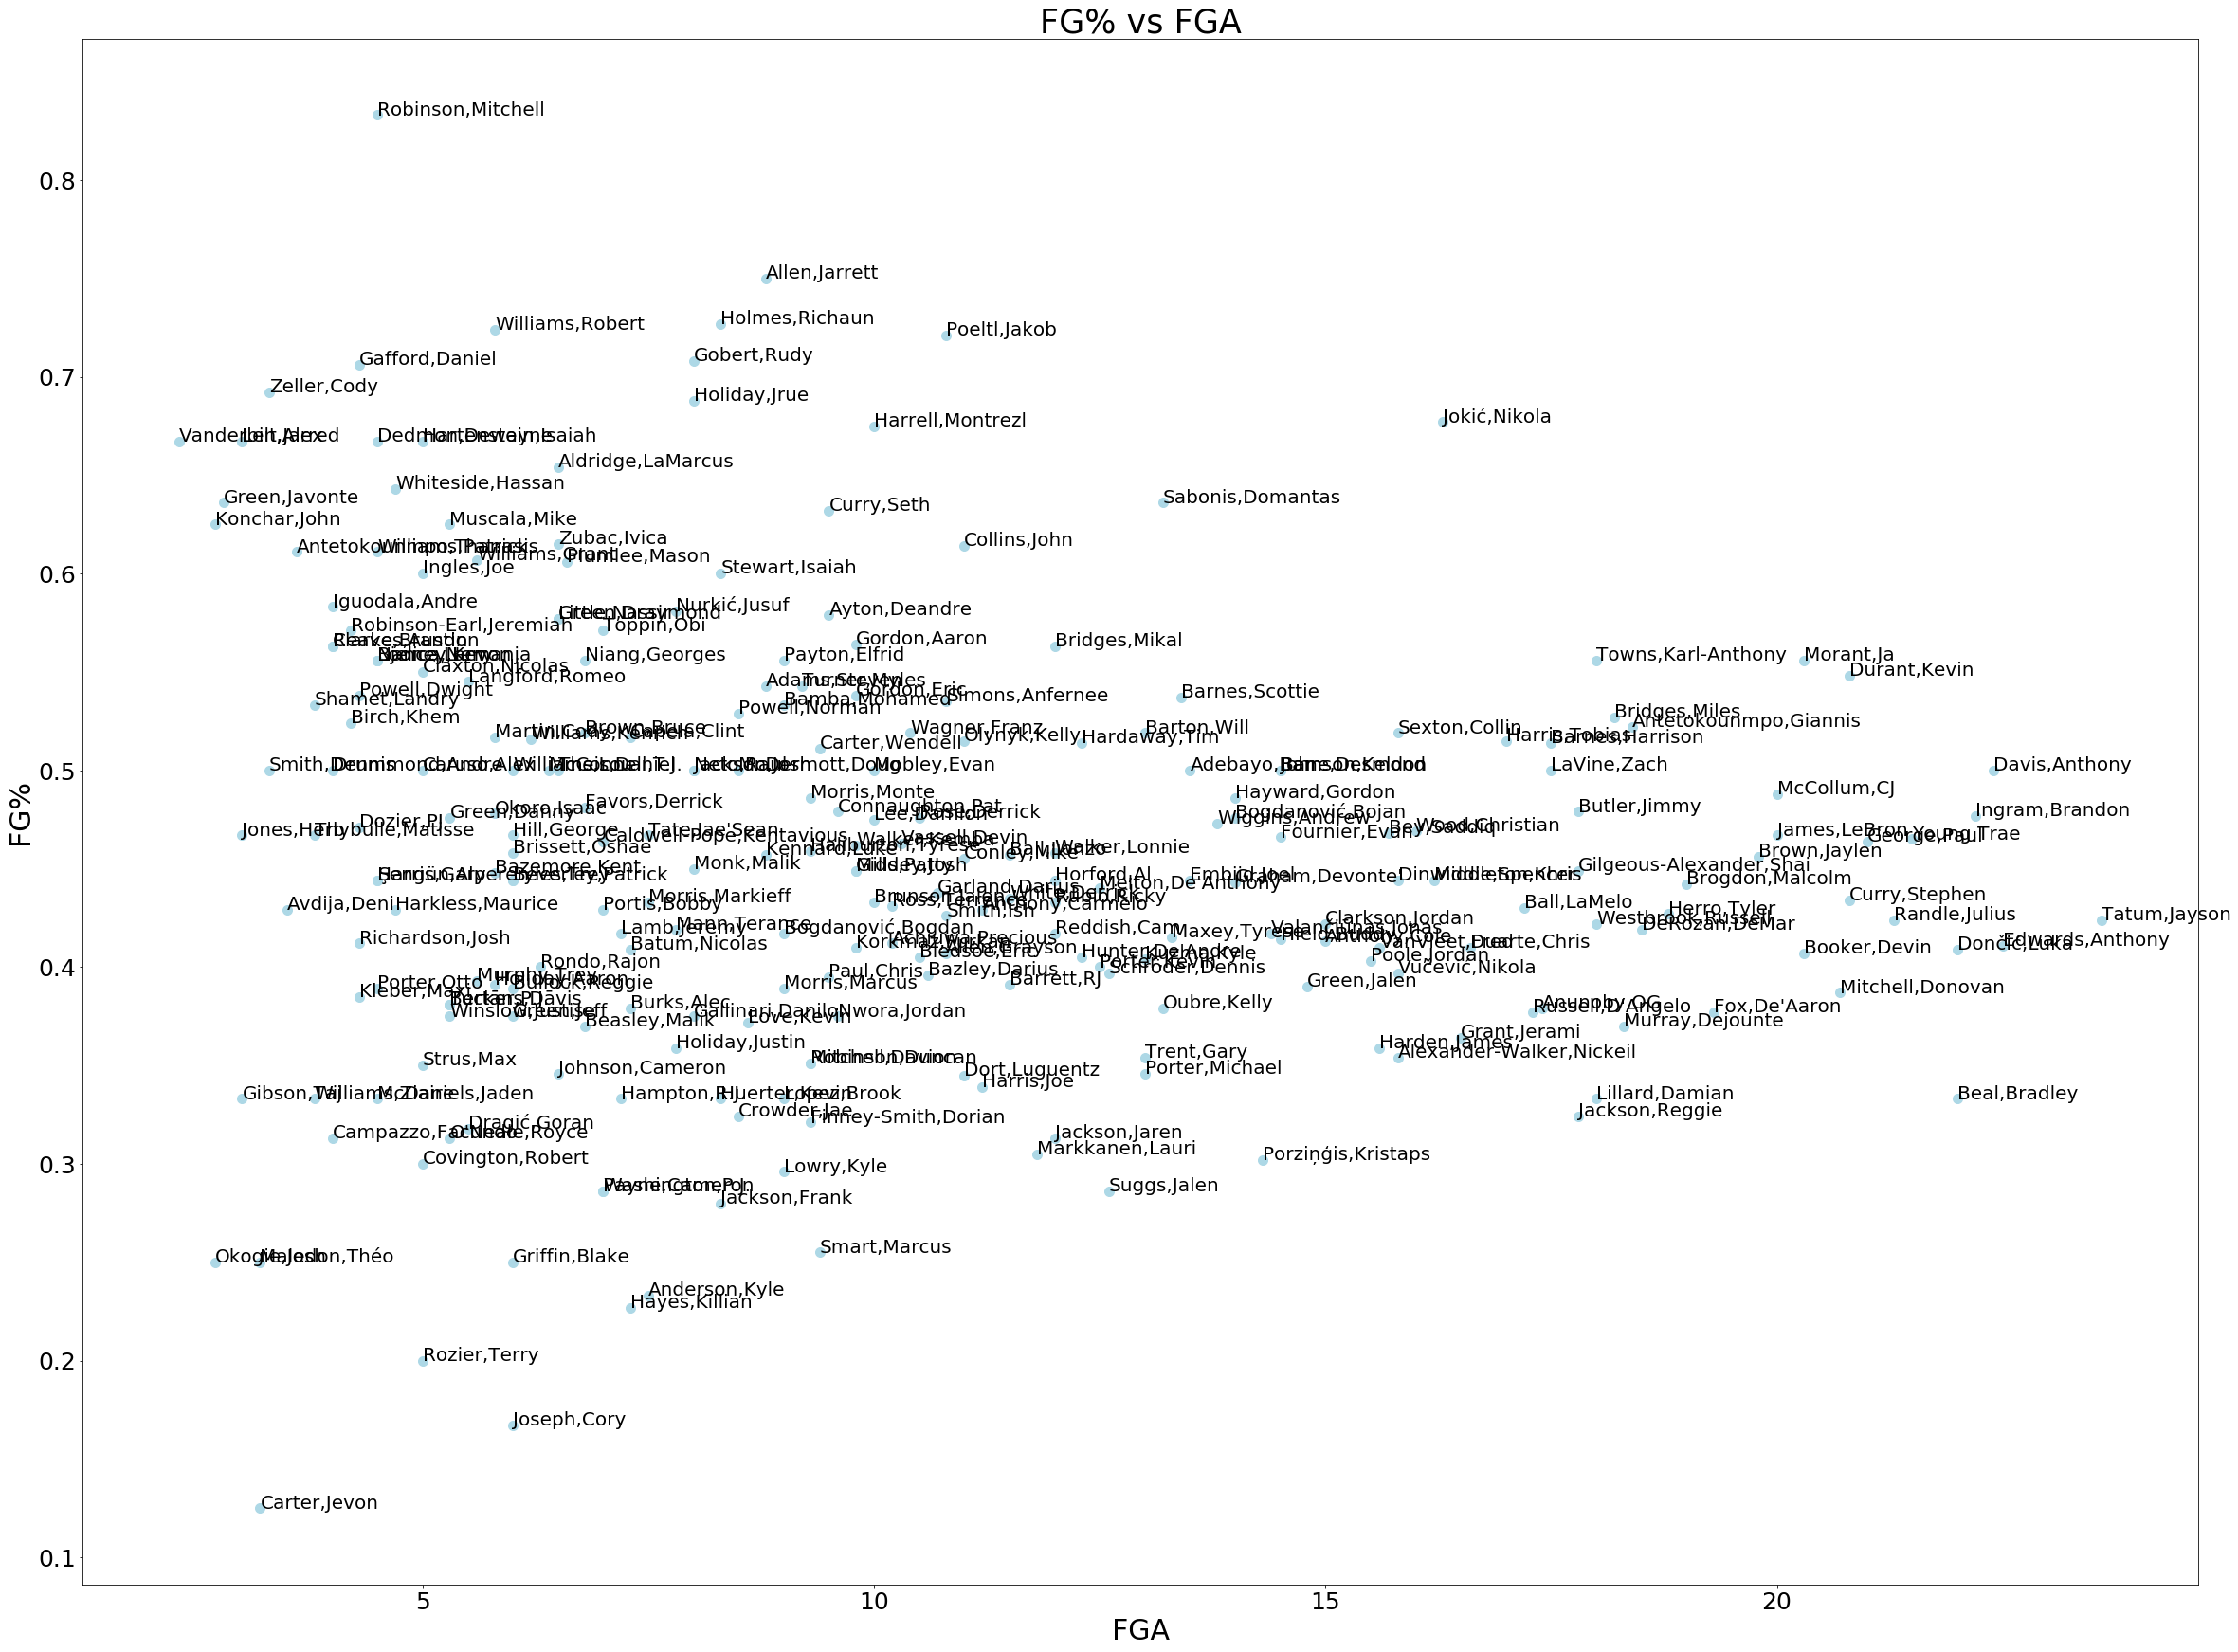

In [16]:
labeled_scatter('FGA', 'FG%', filter_col = "MP", filter_val = 15, greater_than = True)

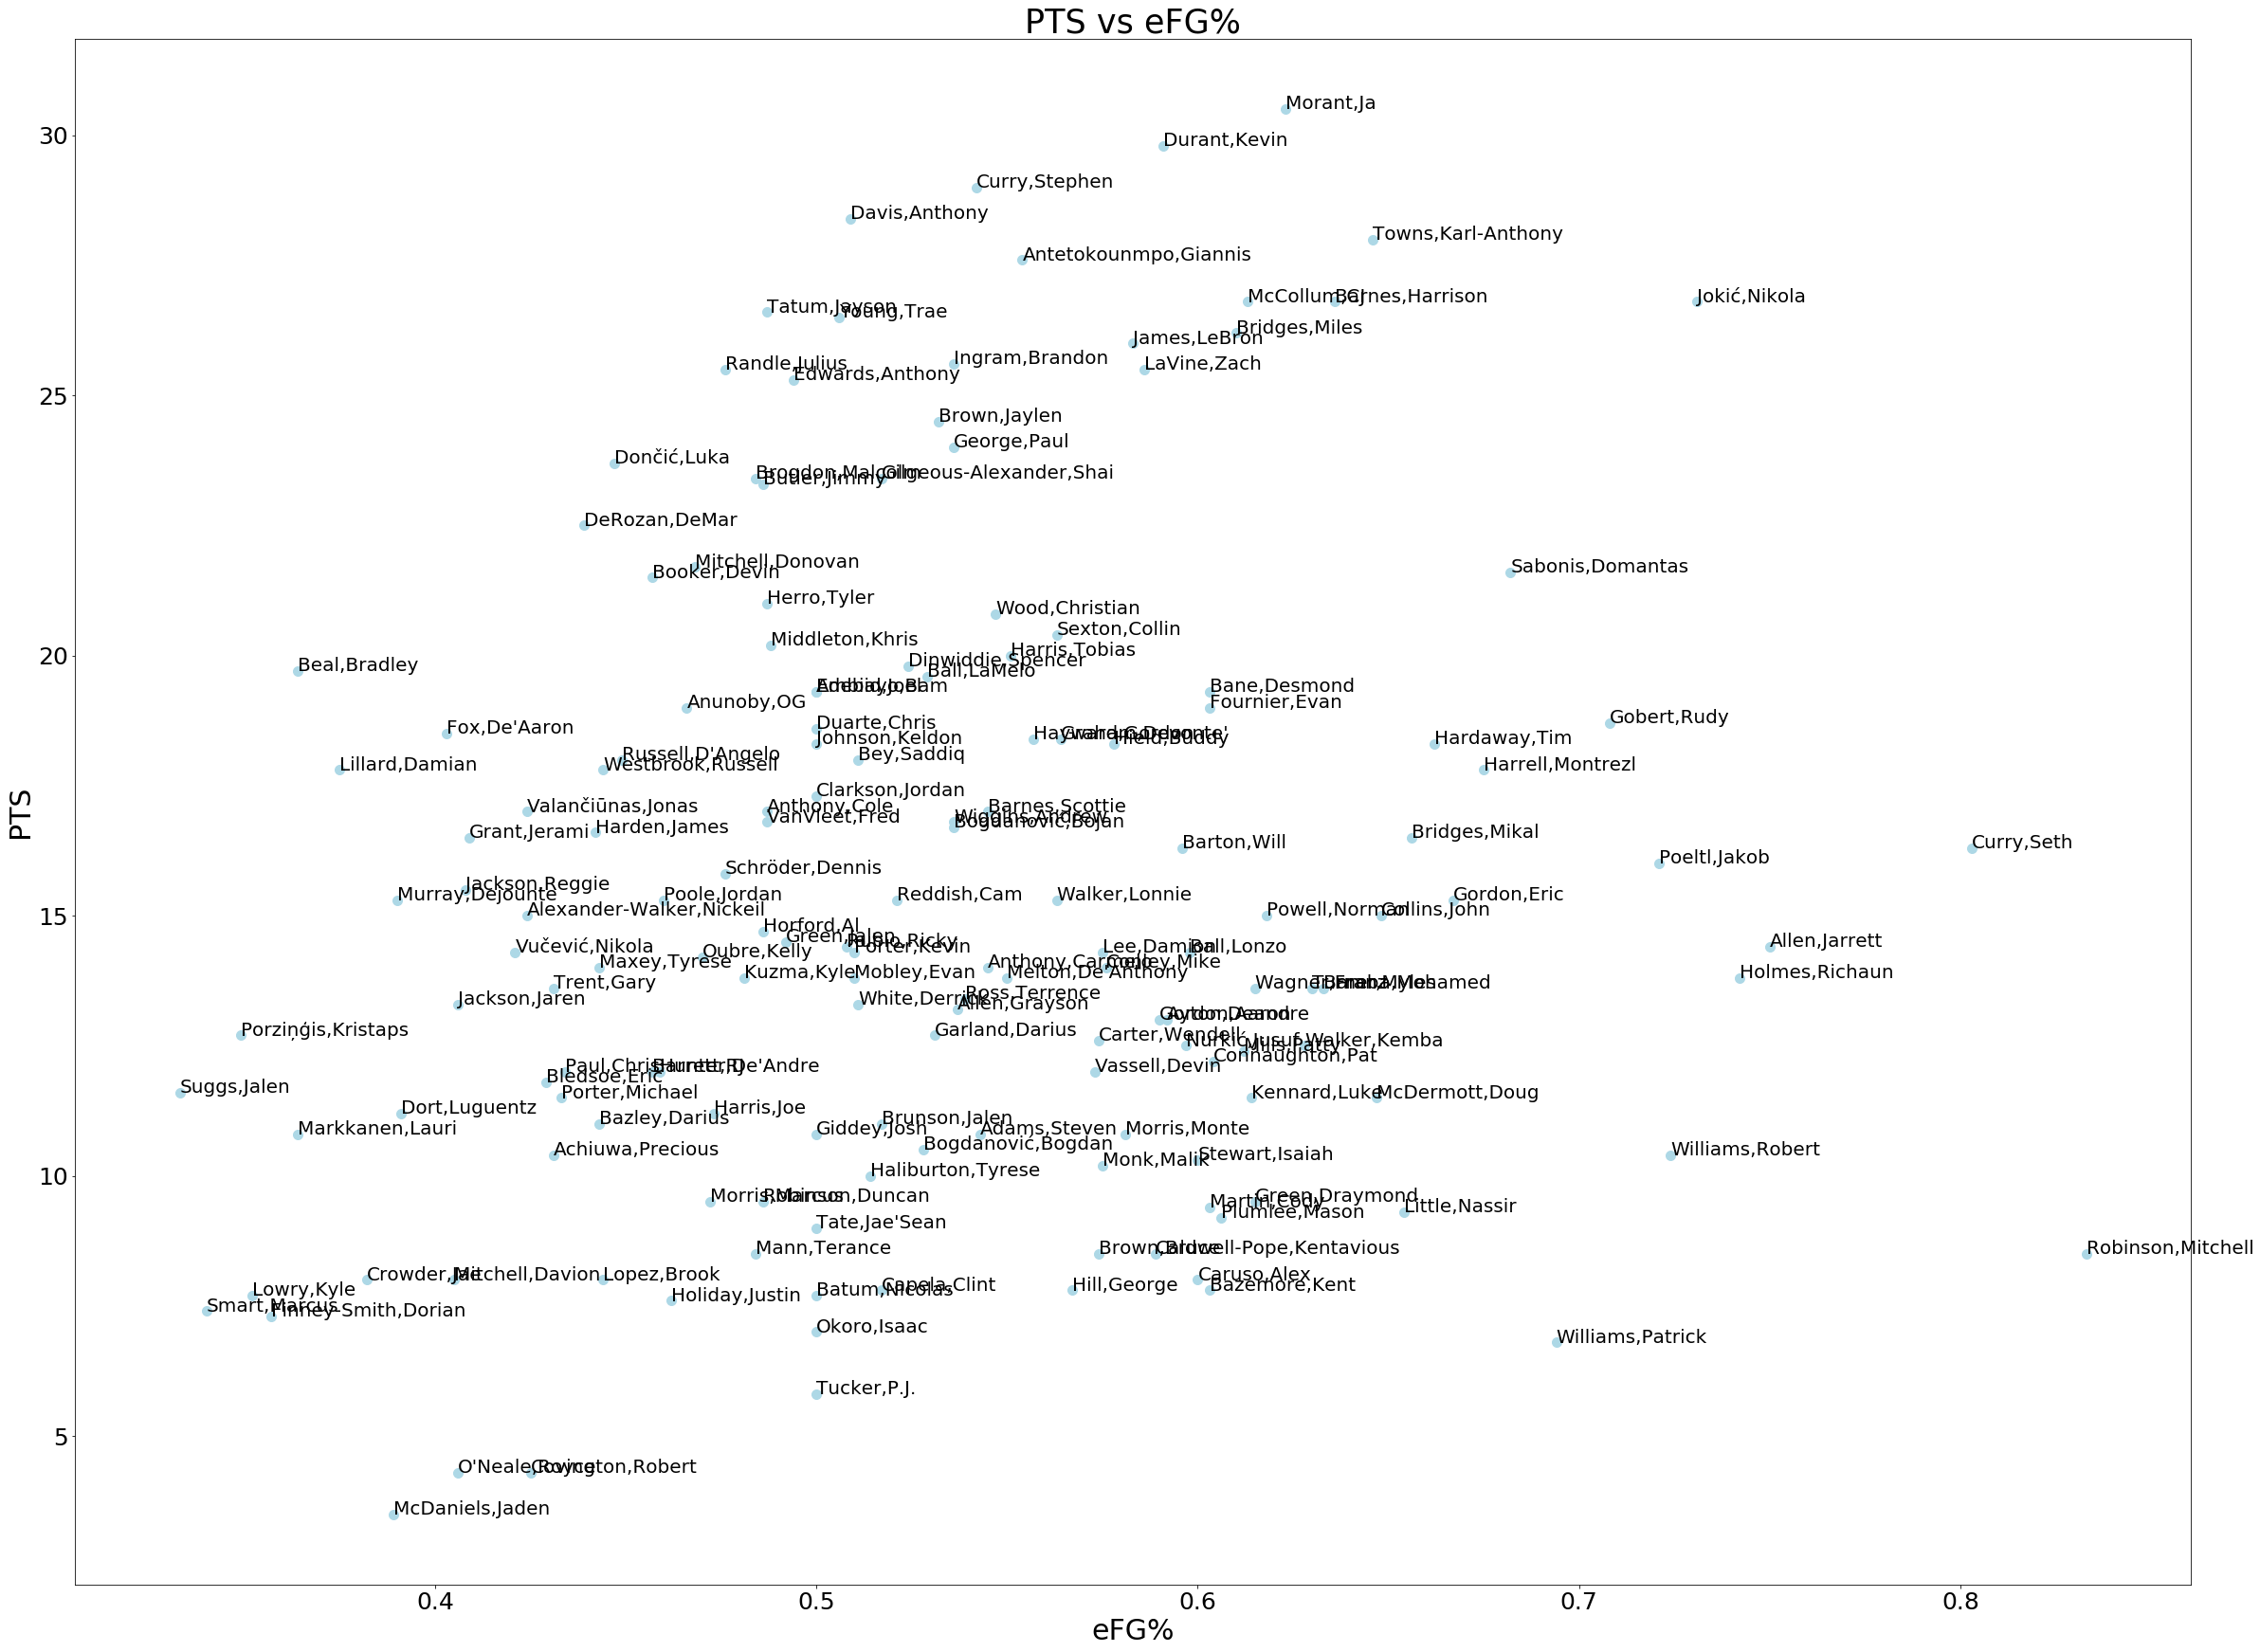

In [22]:
labeled_scatter('eFG%', 'PTS', filter_col = "MP", filter_val = 24, greater_than = True)

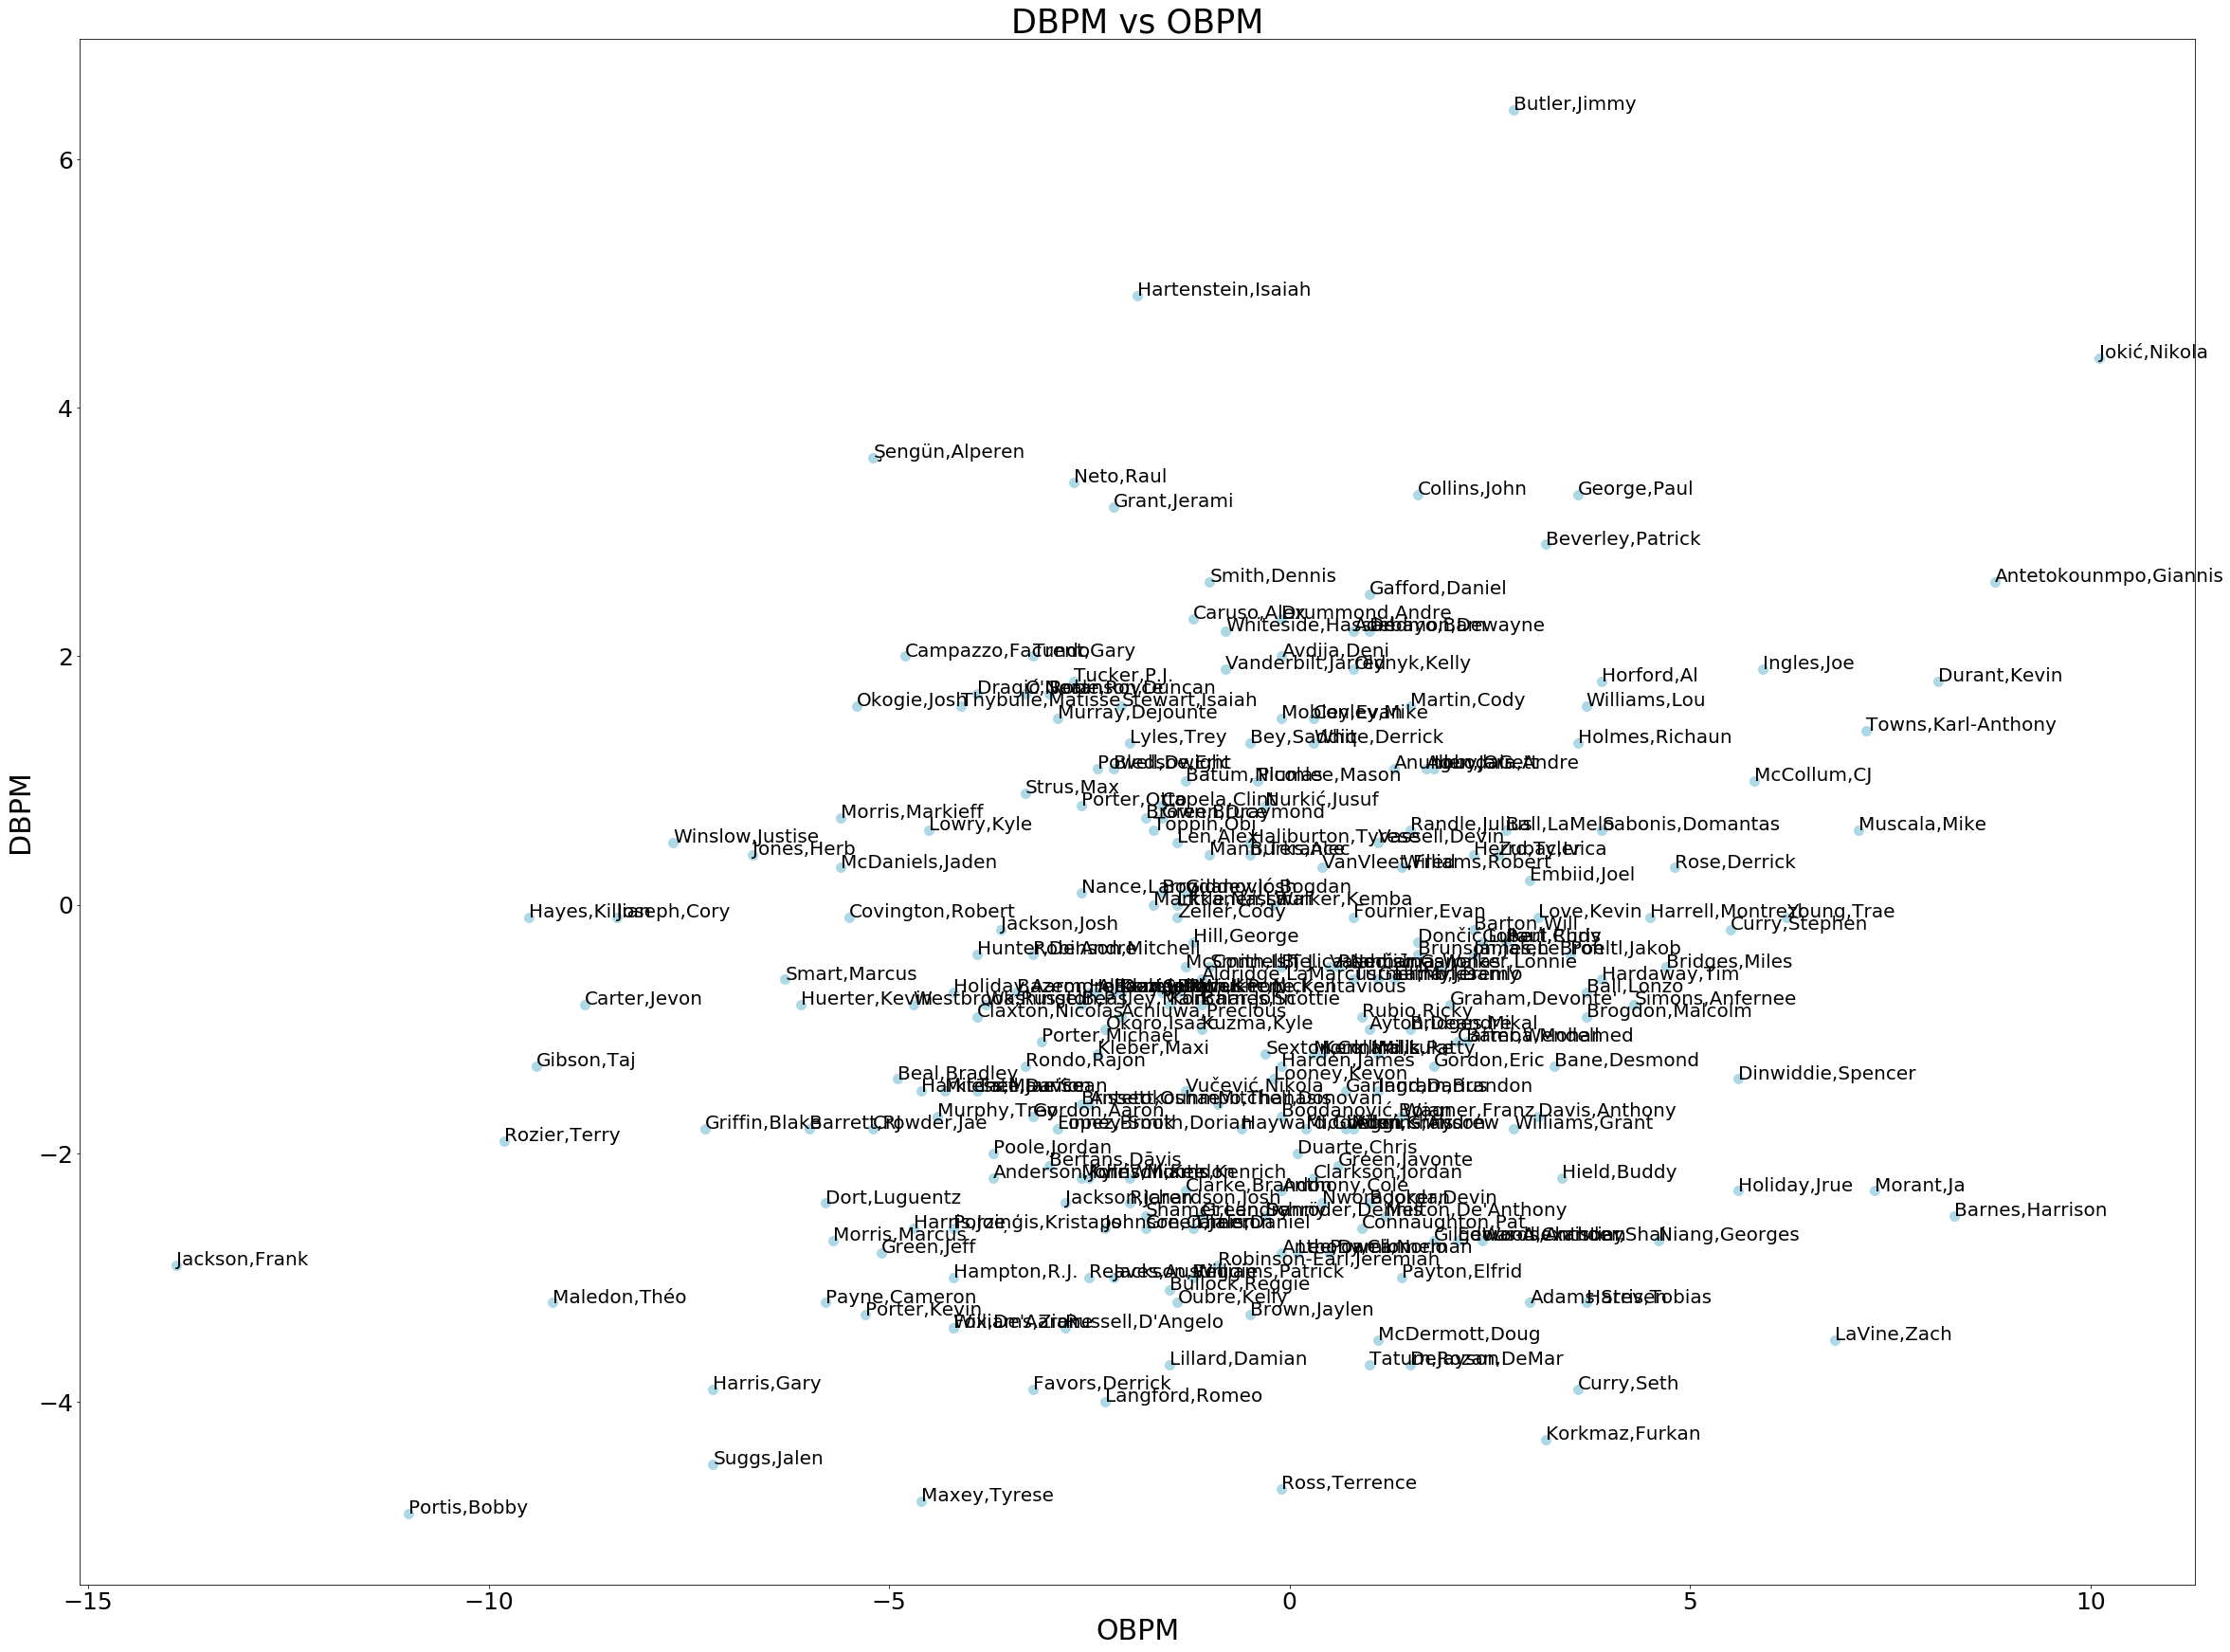

In [23]:
labeled_scatter('OBPM', 'DBPM', filter_col = "MP", filter_val = 15, greater_than = True)

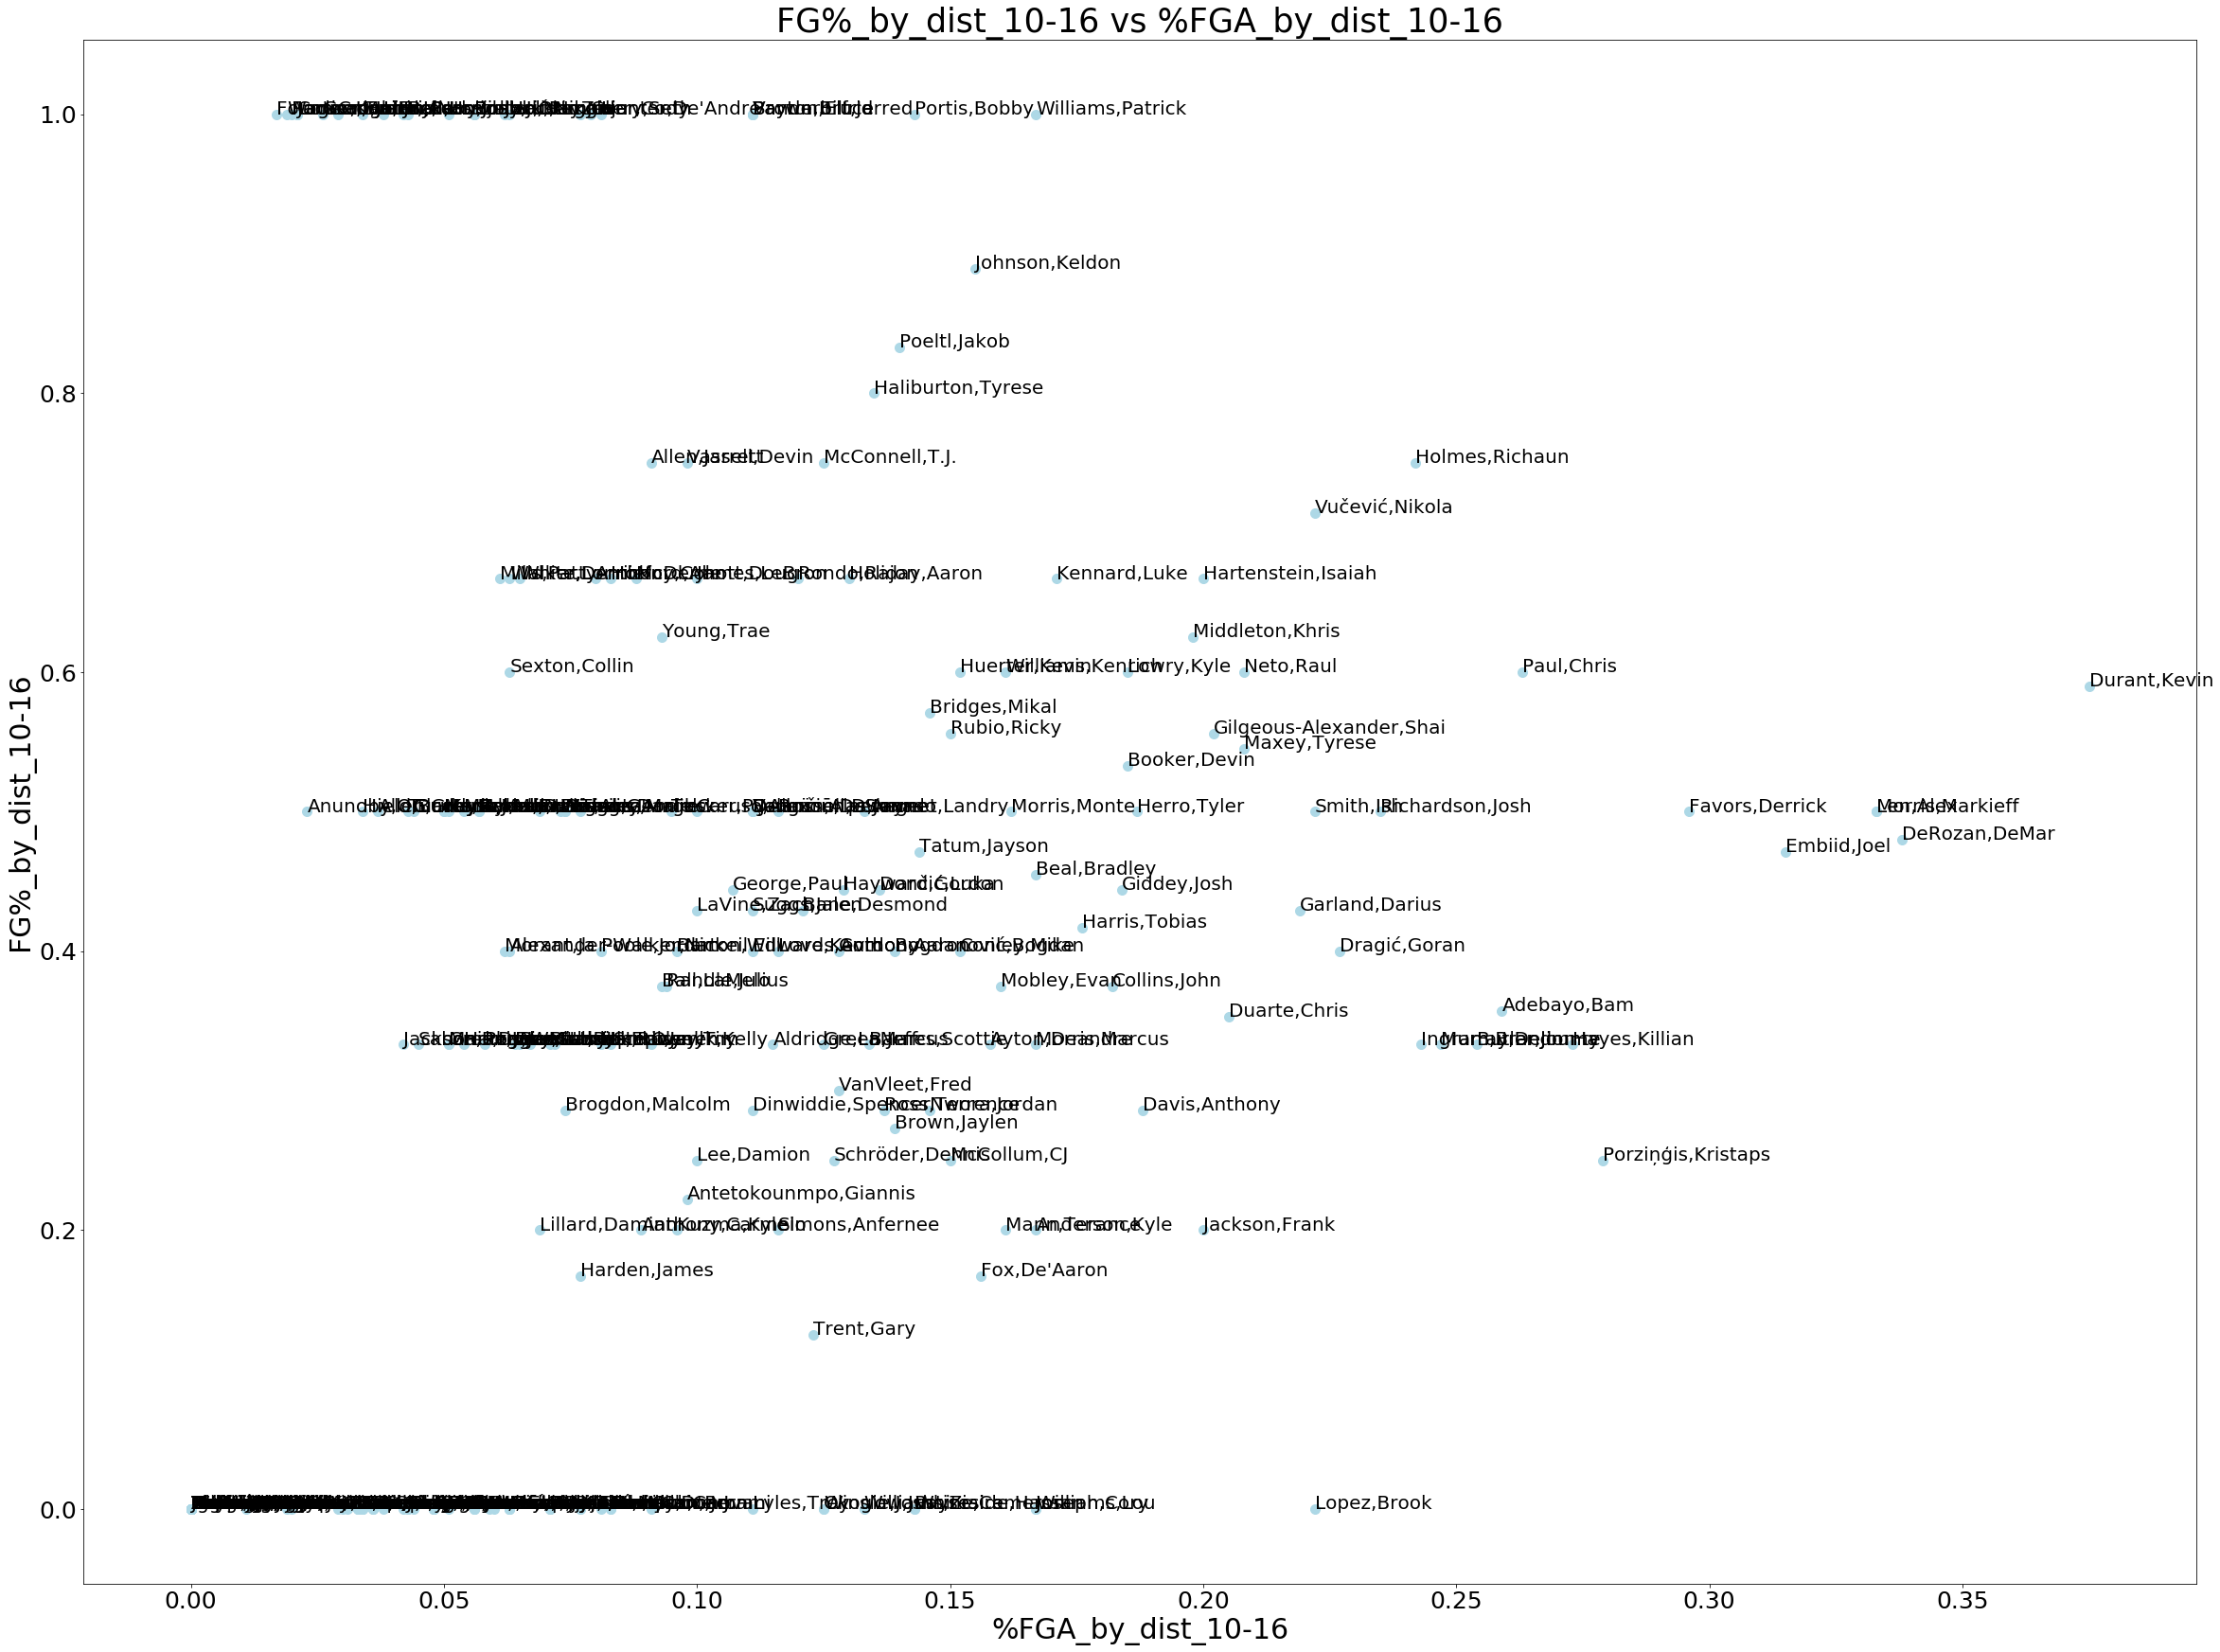

In [24]:
labeled_scatter('%FGA_by_dist_10-16', 'FG%_by_dist_10-16', filter_col = "MP", filter_val = 15, greater_than = True)